# Lista nr 1 (laboratorium)
## zad. 1 (Rozpoznanie arytmetyki) // TODO: float.h
Epsilonem maszynowym macheps (ang. machine epsilon) nazywamy najmniejszą liczbę macheps >
0 taką, że fl(1.0 + macheps) > 1.0.
### a)
Napisać program w języku Julia wyznaczający iteracyjnie epsilony maszynowe dla wszystkich
dostępnych typów zmiennopozycyjnych Float16, Float32, Float64, zgodnych ze standardem
IEEE 754 (half, single, double), i porównać z wartościami zwracanymi przez
funkcje: eps(Float16), eps(Float32), eps(Float64) oraz z danymi zawartymi w pliku
nagłówkowym float.h dowolnej instalacji języka C.

In [1]:
function machEps(dataType)
    epsilon = dataType(1)
    one = dataType(1)
    while (one + (epsilon/2)) != one
        epsilon = epsilon/2
    end
    return epsilon
end

machEps (generic function with 1 method)

In [2]:
println(machEps(Float16))
println(eps(Float16))

0.000977
0.000977


In [3]:
println(machEps(Float32))
println(eps(Float32))

1.1920929e-7
1.1920929e-7


In [4]:
println(machEps(Float64))
println(eps(Float64))

2.220446049250313e-16
2.220446049250313e-16


### b)
Napisać program w języku Julia wyznaczający iteracyjnie liczbę eta taką, że eta > 0.0 dla
wszystkich typów zmiennopozycyjnych Float16, Float32, Float64, zgodnych ze standardem
IEEE 754 (half, single, double), i porównać z wartościami zwracanymi przez funkcje:
nextfloat(Float16(0.0)), nextfloat(Float32(0.0)), nextfloat(Float64(0.0))
Wsk. Rozpocząć od jedynki i dzielić w pętli przez dwa. Weź pod uwagę konwersję typów.
Jaki związek ma liczba macheps z precyzją arytmetyki (oznaczaną na wykładzie przez )?
Jaki związek ma liczba eta z liczbą MINsub (zob. wykład)?

In [5]:
function eta(dataType)
    x = dataType(1)
    while x / 2 != 0
       x = x / 2
    end
    return x
end
println(eta(Float16))
println(eta(Float32))
println(eta(Float64))

6.0e-8
1.0e-45
5.0e-324


In [6]:
nextfloat(Float16(0.0))

Float16(6.0e-8)

### c)
Napisać program w języku Julia wyznaczający iteracyjnie liczbę (MAX) dla wszystkich
typów zmiennopozycyjnych Float16, Float32, Float64, zgodnych ze standardem
IEEE 754 (half, single, double), i porównać z wartościami zwracanymi przez funkcje:
realmax(Float16), realmax(Float32), realmax(Float64) oraz z danymi zawartymi w
pliku nagłówkowym float.h dowolnej instalacji języka C lub z danymi z wykładu.
Wsk.  
Skorzystać z funkcji isinf. Weź również pod uwagę konwersję typów.

In [7]:
function MAX(dataType)
    x = dataType(1)
    while isinf(x * 2) == false
        x = x * 2
    end
    add = x/2
    while isinf(x + add) == false
        x = x + add
        add = add / 2
    end
    return x
end
println(MAX(Float16))
println(MAX(Float32))
println(MAX(Float64))

6.55e4
3.4028235e38
1.7976931348623157e308


In [8]:
println(realmax(Float16))
println(realmax(Float32))
println(realmax(Float64))

6.55e4
3.4028235e38
1.7976931348623157e308


## zad. 2
Kahan stwierdził, że epsilon maszynowy (macheps) można otrzymać obliczając wyrażenie
3(4/3−1)−1 w arytmetyce zmiennopozycyjnej. Sprawdzić eksperymentalnie w języku Julia
słuszność tego stwierdzenia dla wszystkich typów zmiennopozycyjnych Float16, Float32,
Float64.

In [9]:
kahanMachEps(dataType) = dataType(abs(3(4/3-1)-1))
kahanMachEps(Float64)

2.220446049250313e-16

In [10]:
eps(Float64)

2.220446049250313e-16

In [11]:
kahanMachEps(Float32)

2.220446f-16

In [12]:
eps(Float32)

1.1920929f-7

In [13]:
kahanMachEps(Float16)

Float16(0.0)

In [14]:
eps(Float16)

Float16(0.000977)

### Obserwacja
Możemy zauważyć, że twierdzenie zdaje się być prawdziwe jedynie w przypadku gdy typem zmiennopozycyjnym jest **Float64**.

## zad. 3
Sprawdź eksperymentalnie w języku Julia, że w arytmetyce Float64 (arytmetyce double
w standarcie IEEE 754) liczby zmiennopozycyjne są równomiernie rozmieszczone w [1, 2] z
krokiem δ = 2−52. Innymi słowy, każda liczba zmiennopozycyjna x pomiędzy 1 i 2 może
być przedstawione następująco x = 1 + kδ w tej arytmetyce, gdzie k = 1, 2, . . . , 2
52 − 1 i
δ = 2−52
.
Jak rozmieszczone są liczby zmiennopozycyjne w przedziale [
1
2
, 1], jak w przedziale[2, 4] i jak
mogą być przedstawione dla rozpatrywanego przedziału?
Wsk. Skorzystać z funkcji bits

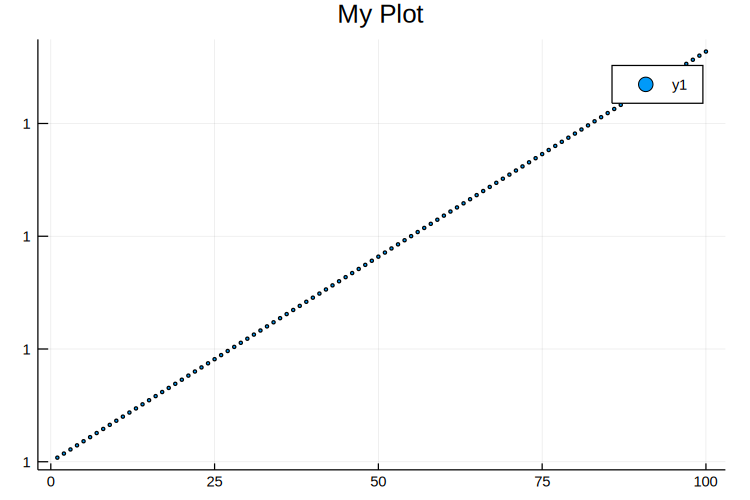

In [5]:
using Plots

d = 2.0^(-52)
function val(k)
    return Float64(1. + k * 2.0^(-38))
end

x = range(1, 100)
Plots.scatter(x, val, markersize=1,title="My Plot", dpi=500)

In [67]:
sin(20)

0.9129452507276277

## zad. 4
Znajdź eksperymentalnie w arytmetyce Float64 zgodnej ze standardem IEEE 754
(double) liczbę zmiennopozycyjną x w przedziale 1 < x < 2, taką, że x ∗ (1/x) != 1; tj.
fl(xfl(1/x)) != 1 (napisz program w języku Julia znajdujący tę liczbę).

In [6]:
x = nextfloat(Float64(1.0))
while x * (1.0/x) == 1.0 && x < 2.0
    x = nextfloat(Float64(x))
end
println(x) # 1.000000057228997

1.000000057228997


## zad. 5
Napisz program w języku Julia realizujący następujący eksperyment obliczania iloczynu
skalarnego dwóch wektorów:

In [5]:
x = [2.718281828, -3.141592654, 1.414213562, 0.5772156649, 0.3010299957]
y = [1486.2497, 878366.9879, -22.37492, 4773714.647, 0.000185049]

5-element Array{Float64,1}:
   1486.25       
 878367.0        
    -22.3749     
      4.77371e6  
      0.000185049

In [6]:
function forwardSum(a, b, n)
    S = 0.0
    for i in 1:n
        S += a[i] * b[i]
    end
    return S
end
forwardSum(x, y, 5)

1.0251881368296672e-10

In [7]:
function reverseSum(a, b, n)
    S = 0.0
    i = n
    while i > 0
        S += a[i] * b[i]
        i = i - 1
    end
    return S
end
reverseSum(x, y, 5)

-1.5643308870494366e-10

In [34]:
function sumPositiveNegative(a, b, reverse=true) 
    s_plus = 0.0
    s_minus = 0.0
    v = zeros(5)
    for i in 1:5
        v[i] = a[i]*b[i]
    end
    sort!(v, rev=reverse)
    for val in v
        if(val < 0)
            s_minus += val
        else
            s_plus += val
        end
    end
    return s_plus + s_minus
end
spn = sumPositiveNegative(x, y, false)

0.0